<a href="https://colab.research.google.com/github/oisincam/Neural-Networks/blob/main/NN_Sin_Waves.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.fft import fft, ifft
from scipy.fft import fft, fftfreq
from random import randint, random, uniform
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

# Categorising Low vs High Frequency Waves

This code generates waves of random frequency that we can train a neural network on

In [2]:
data = []
label = []
x = np.arange(0,7,1/128)# we make the training data; 1000 each of low, medium and high frequency waves
for i in range(1000):# 7 is bigger than 2pi which is period of basic sin wave
  freql = randint(1,5)
  y1 = np.sin(freql*x)
  label.append([1,0,0]) # low freq are label [1,0]
  data.append(y1)
  wave = []

for j in range(1000):
  freqh = randint(6,10)
  y = np.sin(freqh*x)
  label.append([0,1,0])
  data.append(y)

for j in range(1000):
  freqh = randint(11,15)
  y = np.sin(freqh*x)
  label.append([0,0,1])
  data.append(y)
data = np.array(data)
label = np.array(label)

In [3]:
print(data.shape)
(label.shape)

(3000, 896)


(3000, 3)

(3000, 896)

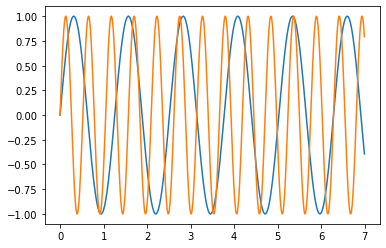

In [4]:
plt.plot(x, data[1,:])
plt.plot(x, data[-1,:])
np.shape(data)

In [5]:
from sklearn.utils import shuffle
trainset, label = shuffle(data, label)

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.metrics import categorical_crossentropy

In [7]:
model = Sequential([
                    Dense(units = 16, input_shape=(896,), activation = 'relu'),
                    Dense(units = 16, activation = 'relu'),
                    Dense(units = 32, activation = 'relu'),
                    Dense(units = 3, activation = 'softmax')
                    

])

In [8]:
model.compile(optimizer= Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [9]:
model.fit(x = trainset, y = label, validation_split=0.1 , batch_size=10, epochs=10, verbose = 2)

Epoch 1/10
270/270 - 2s - loss: 0.5828 - accuracy: 0.8348 - val_loss: 0.3355 - val_accuracy: 1.0000 - 2s/epoch - 6ms/step
Epoch 2/10
270/270 - 1s - loss: 0.1692 - accuracy: 1.0000 - val_loss: 0.0925 - val_accuracy: 1.0000 - 503ms/epoch - 2ms/step
Epoch 3/10
270/270 - 1s - loss: 0.0325 - accuracy: 1.0000 - val_loss: 0.0131 - val_accuracy: 1.0000 - 517ms/epoch - 2ms/step
Epoch 4/10
270/270 - 1s - loss: 0.0076 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000 - 516ms/epoch - 2ms/step
Epoch 5/10
270/270 - 1s - loss: 0.0037 - accuracy: 1.0000 - val_loss: 0.0029 - val_accuracy: 1.0000 - 536ms/epoch - 2ms/step
Epoch 6/10
270/270 - 1s - loss: 0.0021 - accuracy: 1.0000 - val_loss: 0.0018 - val_accuracy: 1.0000 - 533ms/epoch - 2ms/step
Epoch 7/10
270/270 - 1s - loss: 0.0014 - accuracy: 1.0000 - val_loss: 0.0012 - val_accuracy: 1.0000 - 540ms/epoch - 2ms/step
Epoch 8/10
270/270 - 1s - loss: 9.5397e-04 - accuracy: 1.0000 - val_loss: 8.3579e-04 - val_accuracy: 1.0000 - 516ms/epoch - 2ms/

In [10]:
test_data = []
test_label = []
a, b = 0,100
x = np.arange(0,7,1/128)# we make the test data; 5000 is of each wave, with randomised height
for i in range(4950):
  freql = randint(1,5)
  height = uniform(a,b)
  y1 = height*np.sin(freql*x)
  test_label.append([1,0,0]) # low freq are label [1,0]
  test_data.append(y1)

for j in range(4980):
  freqh = randint(6,10)
  height = uniform(a,b)
  y = height*np.sin(freqh*x)
  test_label.append([0,1,0])
  test_data.append(y)

for j in range(5000):
  freqh = randint(11,15)
  height = uniform(a,b)
  y = height*np.sin(freqh*x)
  test_label.append([0,0,1])
  test_data.append(y)
test_data = np.array(test_data)
test_label = np.array(test_label)
test_data, test_label = shuffle(test_data,test_label)


array([0, 1, 0])

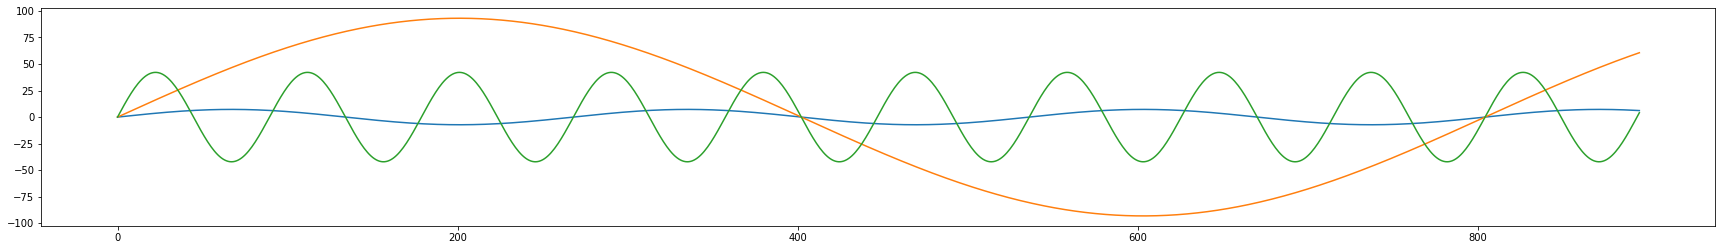

In [11]:
plt.figure(figsize=(30,4))
plt.plot(test_data[3])
plt.plot(test_data[4])
plt.plot(test_data[13])
test_label[13]

In [12]:
preds = model.predict(test_data)

467/467 [==============================] - 1s 1ms/step


In [13]:
preds.argmax(axis=1)

array([2, 2, 1, ..., 0, 1, 0])

In [14]:
r = 0
for v in preds.argmax(axis=1)==test_label.argmax(axis=1):
  if v==True:
    r+=1
print('Test Accuracy is %f'%((r)/len(np.round(preds))))

Test Accuracy is 0.999933


In [15]:
# save the model 
import os

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D, AveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [19]:
modelh = Sequential()
modelh.add(Conv2D(filters = 64, 
                 input_shape = (384,6,1),
                 #data_format = 'channels_last',
                 kernel_size=(25,2), 
                 strides=(1,1),   
                 activation='relu'))
modelh.add(MaxPooling2D(pool_size=(12, 1)))

modelh.add(Conv2D(filters = 32, 
                 input_shape = (340,6,1),
                 #data_format = 'channels_last',
                 kernel_size=(25,2), 
                 strides=(1,1),   
                 activation='relu'))

modelh.add(MaxPooling2D(pool_size=(2,1)))
modelh.add(Dropout(0.2))




modelh.add(Flatten())
#modelh.add(Dropout(0.2))

modelh.add(Dense(16, activation='relu'))
modelh.add(Dense(1, activation = 'linear'))


The model can accurately predict if the wave is high, medium or low frequency, regardless of the amplitude, unless the amplitude is vanishing

In [20]:
from sklearn.metrics import confusion_matrix
import itertools

In [21]:
cm = confusion_matrix(test_label.argmax(axis=1), preds.argmax(axis=1))
cm

array([[4950,    0,    0],
       [   0, 4980,    0],
       [   1,    0, 4999]])

In [22]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [23]:
cm_plot_labels= ['low', 'medium', 'high']

Confusion matrix, without normalization
[[4950    0    0]
 [   0 4980    0]
 [   1    0 4999]]


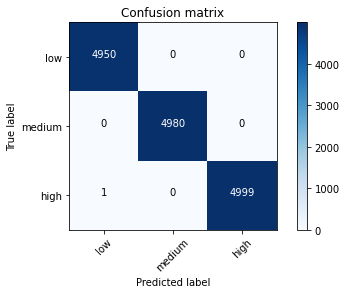

In [24]:
plot_confusion_matrix(cm, classes = cm_plot_labels)

In [25]:
# Time to investigate the two wrong predictions
r = 0
for v in preds.argmax(axis=1)==test_label.argmax(axis=1):
  if v==False:
    print(r)
  r+=1

13909


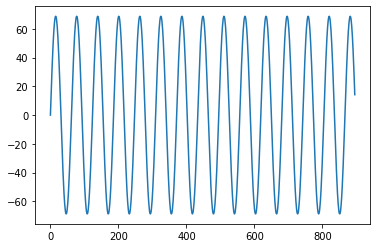

In [26]:
plt.plot(test_data[5997])

# Categorising Wave Height

In [ ]:
data = []
label = []
x = np.arange(0,7,1/128)# we make the training data; 1000 each of small, medium , large waves
for i in range(900):
  height1=randint(1,3)
  y1 = height1*np.sin(x)
  label.append([1,0,0]) # 
  data.append(y1)

for i in range(1000):
  height2 = randint(4,6)
  y = height2*np.sin(x)
  label.append([0,1,0])
  data.append(y)

for i in range(1100):
  height3 = randint(7,10)
  y = height3*np.sin(x)
  label.append([0,0,1])
  data.append(y)
data = np.array(data)
label = np.array(label)

In [ ]:
from sklearn.utils import shuffle
trainset, label = shuffle(data, label)


In [ ]:
print(trainset.shape)

(3000, 896)


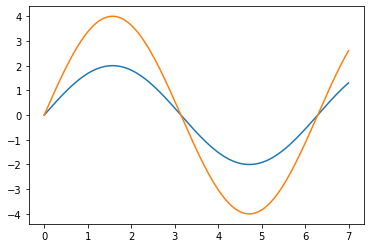

In [ ]:
plt.plot(x, trainset[0])
plt.plot(x, trainset[1])

In [ ]:
model = Sequential([
                    Dense(units = 16, input_shape=(896,), activation = 'relu'),
                    Dense(units = 16, activation = 'relu'),
                    Dense(units = 32, activation = 'relu'),
                    Dense(units = 3, activation = 'softmax')
                    

])

In [ ]:
model.compile(optimizer= Adam(learning_rate = 0.0001), loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
model.fit(x = trainset, y = label, validation_split=0.1 , batch_size=10, epochs=25, verbose = 2)# batch size makes it learn faster but less well
# the amount of data matters loads. With 15000 sample we converge in about 4 epochs, with 3000 it takes like 15(for batch size 6)
#the rest of this is with sample size size 3000
# for batch size 20, we converge after 50 epochs but bounce a lot still
# for batch size 15 we converge after 28 and remain steady. 
# learning rate of 0.1 gets us nowhere, same for 0.000001
# 0.003 is in the sweetspot

In [ ]:
test_data = []
test_label = []
x = np.arange(0,7,1/128)# we make the test data; 200 each of small, medium , large waves
for i in range(200):
  height1=randint(1,3)
  y1 = height1*np.sin(x)
  test_label.append([1,0,0]) # 
  test_data.append(y1)

for i in range(230):
  height2 = randint(4,6)
  y = height2*np.sin(x)
  test_label.append([0,1,0])
  test_data.append(y)

for i in range(250):
  height3 = randint(7,10)
  y = height3*np.sin(x)
  test_label.append([0,0,1])
  test_data.append(y)
test_data = np.array(test_data)
test_label = np.array(test_label)

In [ ]:
preds = model.predict(test_data)

In [ ]:
r = 0
for v in preds.argmax(axis=1)==test_label.argmax(axis=1):
  if v==True:
    r+=1
print('Test Accuracy is %f'%((r)/len(np.round(preds))))

Test Accuracy is 1.000000


In [ ]:
# It doesn't get much better than that

# Predicting Wave Frequency

In [ ]:
data = []
freq = []
x = np.arange(0,7,1/12)# 1/12 is the sampling period of the IMU
for i in range(15000):
  f = uniform(0.1,1)
  y = np.sin(f*(2*np.pi)*x)
  data.append(y)
  freq.append(f)
data=np.array(data)
freq=np.array(freq)

In [ ]:
data,freq = shuffle(data,freq)

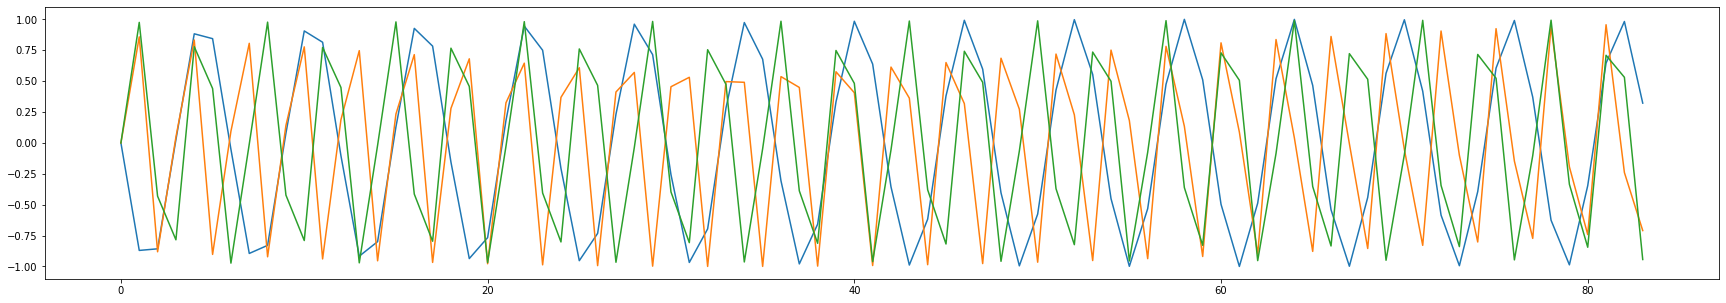

In [ ]:
plt.figure(figsize=(30,5))
plt.plot(data[0])
plt.plot(data[1])
plt.plot(data[6])

In [ ]:
model = Sequential([
                    Dense(units = 16, input_shape=(84,), activation = 'relu'),
                    Dense(units = 16, activation = 'relu'),
                    Dense(units = 32, activation = 'relu'),
                    Dense(units = 1, activation = 'linear')# we want a linear activation for regression purposes
                    

])

In [ ]:
model.compile(optimizer= Adam(learning_rate = 0.00005), loss = 'mse', metrics= ['mse'])

In [ ]:
model.fit(x = data, y = freq, validation_split=0.1 , batch_size=30, epochs=25, verbose = 2)# if we train our model on too broad a set of frequencies it gets worse
#Best val mse: 1.21e-05 for f range (0.1,1)
#1.6e-04 for f range (1,10) 

In [ ]:
test_data = []
test_freq = []
x = np.arange(0,7,1/12)# 1/12 is the sampling period of the IMU
for i in range(600):
  f = uniform(1,10)
  y = np.sin(f*(2*np.pi)*x)
  test_data.append(y)
  test_freq.append(f)
test_data=np.array(test_data)
test_freq=np.array(test_freq)

test_data, test_freq = shuffle(test_data,test_freq)

In [ ]:
preds =model.predict(test_data)

In [ ]:
np.concatenate([preds,test_freq.reshape(-1,1)], axis=1)


array([[0.25627968, 3.70384442],
       [0.24974361, 7.06512175],
       [0.50513291, 1.43414019],
       ...,
       [0.04827795, 6.80209818],
       [0.71705049, 7.35708525],
       [0.13256449, 2.60208219]])

In [ ]:
np.mean(np.abs(preds-test_freq.reshape(-1,1)))


0.008700464005353545

In [ ]:
model.predict(np.array([np.sin(3.45*(2*np.pi)*x)]))

array([[-0.23117228]], dtype=float32)

So we can get within 0.002 ( depends on which model you end up with)
The model is awful outside the range (0,10)

# Predicting Wave Height Value

In [ ]:
data = []
height = []
x = np.arange(0,7,1/12)# we make the training data; 5000 each of small, medium , large waves
for i in range(3000):
  h=randint(-10,10)
  y = h*np.sin(x) 
  height.append(h)
  data.append(y)

data = np.array(data)
height = np.array(height)

In [ ]:
from sklearn.utils import shuffle
trainset, height = shuffle(data, height)


(3000, 84)


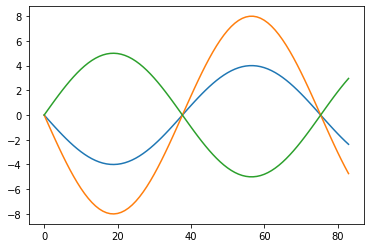

In [ ]:
plt.plot(trainset[1])
plt.plot(trainset[2])
plt.plot(trainset[3])
print(trainset.shape)

In [ ]:
model = Sequential([
                    Dense(units = 16, input_shape=(84,), activation = 'relu'),
                    Dense(units = 16, activation = 'relu'),
                    Dense(units = 32, activation = 'relu'),
                    Dense(units = 1, activation = 'linear')# we want a linear activation for regression purposes
                    

])

In [ ]:
model.compile(optimizer= Adam(learning_rate = 0.00001), loss = 'mse', metrics= ['mse'])

In [ ]:
model.fit(x = trainset, y = height, validation_split=0.1 , batch_size=10, epochs=25, verbose = 2)

Epoch 1/5
270/270 - 1s - loss: 2.1626e-07 - mse: 2.1626e-07 - val_loss: 6.4391e-12 - val_mse: 6.4391e-12 - 845ms/epoch - 3ms/step
Epoch 2/5
270/270 - 1s - loss: 3.8197e-12 - mse: 3.8197e-12 - val_loss: 5.2793e-12 - val_mse: 5.2793e-12 - 703ms/epoch - 3ms/step
Epoch 3/5
270/270 - 1s - loss: 1.8735e-12 - mse: 1.8735e-12 - val_loss: 2.8064e-12 - val_mse: 2.8064e-12 - 541ms/epoch - 2ms/step
Epoch 4/5
270/270 - 0s - loss: 2.7477e-12 - mse: 2.7477e-12 - val_loss: 4.5495e-13 - val_mse: 4.5495e-13 - 459ms/epoch - 2ms/step
Epoch 5/5
270/270 - 0s - loss: 6.6362e-12 - mse: 6.6362e-12 - val_loss: 2.8726e-12 - val_mse: 2.8726e-12 - 441ms/epoch - 2ms/step


In [ ]:
test_data = []
test_height = []
x = np.arange(0,7,1/12)# we make the test data
for i in range(600):
  height1=randint(-10,10)
  y = height1*np.sin(x) 
  test_height.append(height1)
  test_data.append(y)
test_data = np.array(test_data)
test_height = np.array(test_height)

In [ ]:
test_data, test_height = shuffle(test_data,test_height)

In [ ]:
preds = model.predict(test_data)

In [ ]:
np.concatenate([preds,test_height.reshape(-1,1)], axis=1)

array([[  3.00000048,   3.        ],
       [ -5.00000238,  -5.        ],
       [  7.00000095,   7.        ],
       ...,
       [-10.00000477, -10.        ],
       [ 10.00000095,  10.        ],
       [ -4.00000143,  -4.        ]])

In [ ]:
np.mean(np.abs(preds-test_height.reshape(-1,1)))

1.2353675750394663e-06

In [ ]:
model.predict(2*np.array([np.sin(x)]))

array([[2.]], dtype=float32)

The model converges much more quickly when it comes to predicting wave height
It predicts great for any number, although absolute difference drops off as number gets really big ( obvs). 

If we change the frequency of the wave the model gets it totally wrong

# Predicting Both Wave Height and Frequency

In [ ]:
data = []
values =[]
x = np.arange(0,7,1/12)# we make the training data; 30000 waves, over 7 seconds, at 12 hz 
for i in range(30000):
  h=uniform(1,10)
  f = uniform(0.1,3)
  y = h*np.sin(f*(2*np.pi)*x) 

  values.append(np.array([h,f]))
  data.append(y)

data = np.array(data)
values = np.array(values)

data, values = shuffle(data, values)

[5.61387698 1.80575397]
[7.73124362 0.71473869]
[3.88546968 0.21784136]


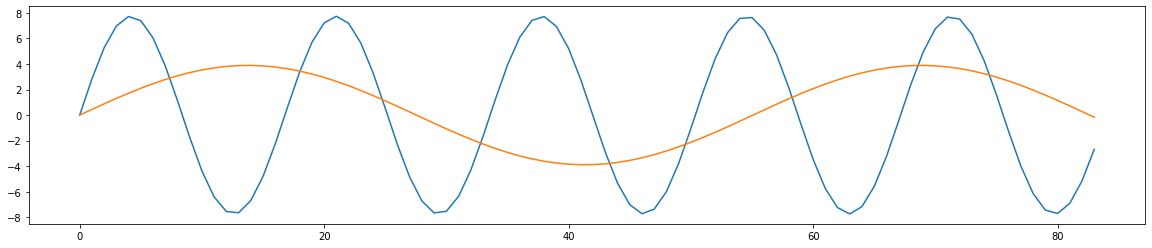

In [ ]:
plt.figure(figsize=(20,4))
plt.plot(data[1])
plt.plot(data[3])
print(values[0])
print(values[1])
print(values[3])

In [ ]:
model = Sequential([
                    Dense(units = 80, input_shape=(84,), activation = 'relu'),
                    #Dropout(0.2),
                    Dense(units = 60, activation = 'relu'),
                    #Dropout(0.2),
                    Dense(units = 60, activation = 'relu'),
                    Dense(units = 32, activation = 'relu'),
                    #Dropout(0.2),
                    Dense(units = 2, activation = 'linear')# we want a linear activation for regression purposes
                    

])

In [ ]:
model.compile(optimizer= Adam(learning_rate = 0.000001), loss = 'mse', metrics= ['mse'])

In [ ]:
model.fit(x = data, y = values, validation_split=0.1 , batch_size=40, epochs=10, verbose = 2)# i ran the model at 0.0003 learning rate for 25 epochs, it looked stuck, so i switched to 0.0001 for 25 more
#I then did a bunch more at 0.00007 to get it right down
#Best i can get it 2.1e-04 9 for freq range (1,10)
# 3.6e--4 for range (0.1,1), after over 100 epochs and bringing the learning rate right dowm 
# I added more nodes and got it to 5.2e-05, which requires a tiny tiny learning rate
# If I also train on negative amps, best is 0.0014

Epoch 1/10
675/675 - 2s - loss: 4.2565e-05 - mse: 4.2565e-05 - val_loss: 5.1854e-05 - val_mse: 5.1854e-05 - 2s/epoch - 3ms/step
Epoch 2/10
675/675 - 2s - loss: 4.2378e-05 - mse: 4.2378e-05 - val_loss: 5.2115e-05 - val_mse: 5.2115e-05 - 2s/epoch - 3ms/step
Epoch 3/10
675/675 - 1s - loss: 4.2324e-05 - mse: 4.2324e-05 - val_loss: 5.1821e-05 - val_mse: 5.1821e-05 - 1s/epoch - 2ms/step
Epoch 4/10
675/675 - 1s - loss: 4.2280e-05 - mse: 4.2280e-05 - val_loss: 5.1723e-05 - val_mse: 5.1723e-05 - 1s/epoch - 2ms/step
Epoch 5/10
675/675 - 1s - loss: 4.2250e-05 - mse: 4.2250e-05 - val_loss: 5.1697e-05 - val_mse: 5.1697e-05 - 1s/epoch - 2ms/step
Epoch 6/10
675/675 - 1s - loss: 4.2213e-05 - mse: 4.2213e-05 - val_loss: 5.1674e-05 - val_mse: 5.1674e-05 - 1s/epoch - 2ms/step
Epoch 7/10
675/675 - 2s - loss: 4.2189e-05 - mse: 4.2189e-05 - val_loss: 5.1570e-05 - val_mse: 5.1570e-05 - 2s/epoch - 3ms/step
Epoch 8/10
675/675 - 1s - loss: 4.2160e-05 - mse: 4.2160e-05 - val_loss: 5.1581e-05 - val_mse: 5.1581e-0

In [ ]:
test_data = []
test_values =[]
x = np.arange(0,7,1/12)# we make the test data; 600 waves of varying height and frequency
for i in range(600):
  h=uniform(1,10)
  f = uniform(0.1,3)
  y = h*np.sin(f*(2*np.pi)*x) 

  test_values.append(np.array([h,f]))
  test_data.append(y)

test_data = np.array(test_data)
test_values = np.array(test_values)

test_data, test_values = shuffle(test_data, test_values)

In [ ]:
preds = model.predict(test_data)

In [ ]:
preds


array([[2.6112661 , 2.9946055 ],
       [5.8521433 , 1.6483593 ],
       [7.6493325 , 0.8248044 ],
       ...,
       [8.79996   , 1.053656  ],
       [5.365343  , 0.83334094],
       [6.200123  , 1.8072412 ]], dtype=float32)

In [ ]:
test_values

array([[2.60569055, 2.99253767],
       [5.84595901, 1.66476179],
       [7.65605944, 0.82189029],
       ...,
       [8.79581622, 1.05207422],
       [5.36214901, 0.8277296 ],
       [6.20095239, 1.80709999]])

In [ ]:
print(np.concatenate([preds,test_values.reshape(-1,2)], axis=1))
print(np.mean(np.abs(preds[:,0]-test_values.reshape(-1,2)[:,0])))# best I can get is 0.005 for both
print(np.mean(np.abs(preds[:,1]-test_values.reshape(-1,2)[:,1])))

[[2.61126614 2.99460554 2.60569055 2.99253767]
 [5.85214329 1.6483593  5.84595901 1.66476179]
 [7.64933252 0.82480443 7.65605944 0.82189029]
 ...
 [8.79996014 1.05365598 8.79581622 1.05207422]
 [5.36534309 0.83334094 5.36214901 0.8277296 ]
 [6.20012283 1.8072412  6.20095239 1.80709999]]
0.0037924409164473327
0.006465434372126234


In [ ]:
model.predict(np.array([-10*np.sin(1.4*(2*np.pi)*x)]))
#the model works excellently for the training data ranges, h in (5,20), f in (0.1,1)
# it works decently for h outside, but f outside seems to mess everything up
#This is because in training the wave heights were bigger and so the model got a greater reward for optimising the wave height

array([[-10.02301  ,   1.3804095]], dtype=float32)

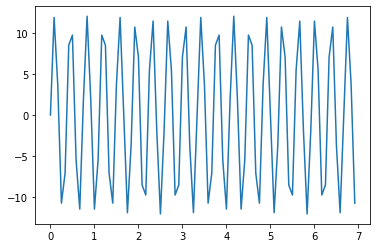

In [ ]:
# now i test it on noisy data
y = 12*np.sin(2.7*(2*np.pi)*x) #+np.random.rand(84)/2
plt.plot(x,y)

In [ ]:
model.predict(np.array([y]))

In [ ]:
# the model works less well for noisy data, and f is particularly vulnerable

Comparing model with fourier transform

In [ ]:
from scipy.fft import fft, ifft, fftfreq, rfft, rfftfreq

In [ ]:
def ftmax(data, plot =False): # this function will return the single largest frequency in the fourier transofrm of an array
  y = fft(np.array(data))
  N = len(y)
  n = np.arange(N) # this is the frequency axis, but not yet scaled by time ( duration of measurement).
  sr = 12 # number of samples per second
  sd = 1/sr # number of seconds per sample
  T = N/sr # the measurement duration, same as number of samples times seconds per sample, unit is seconds
  freq = rfftfreq(N,sd) # we scale the frequency based on measurement duration
  n_oneside = N//2 # we only care about the positive half of the spectrum
  freq_oneside = freq[1:n_oneside]# 
  # if your frequency range was say (-10,10), the frquencies are listed like [0,1,2,..10,-10,-9,..-1,0]
  if plot==True:
    plt.stem(freq_oneside,np.abs(y)[1:N//2]) # we only take the positive frequencies, and leave out 0 which is artificially big
    #plt.xlim(0,2)
    plt.xlabel('frequency')
  return freq_oneside[np.argmax(np.abs(y)[1:N//2])] # give us the biggest frequency

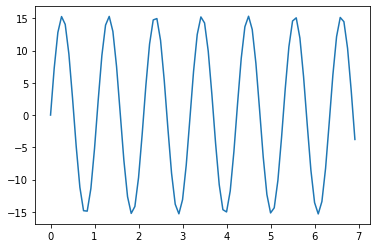

In [ ]:
plt.plot(x,test_data[0])

In [ ]:
print(test_values[0])
print(preds[0])

[15.33639092  0.94549689]
[15.338328    0.94612455]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]


1.0

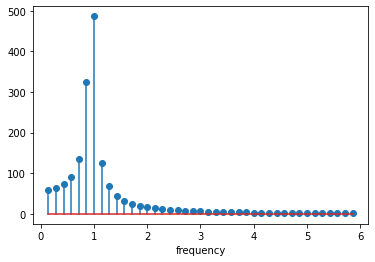

In [ ]:
ftmax(test_data[0], plot = True)

In [ ]:
# the model performs better than ft! I think. ftmax need some tweaking; just taking the biggest f value isn't really representative. 